Floresta aleatória
==================



## Com muitas árvores temos uma floresta



Nós vimos no notebook anterior o algoritmo de árvore de decisão. Ele gera modelos relativamente simples e explicáveis, porém a performance destes modelos muitas vezes deixa a desejar.

Uma estratégia para contornar a baixa performance de árvores de decisão é montar um comitê (*ensemble*) contendo diversas árvores de decisão onde cada uma realiza sua previsão individual; podemos considerar que cada uma dessas previsões são &ldquo;votos&rdquo; e considerando todos os votos nós podemos chegar em uma resposta final. A expectativa é que a combinação de diferentes modelos com alto viés e baixa variância resulte em um modelo com maior variância e menor viés. Com isso, a expectativa é de que a performance do comitê seja melhor do que a performance dos membros sozinhos.

O nome do algoritmo descrito acima é &ldquo;floresta aleatória&rdquo;. É uma &ldquo;floresta&rdquo; pois é feita de diversas *árvores* de decisão. É &ldquo;aleatória&rdquo; pois o processo de construir cada uma das árvores de decisão desta floresta envolve amostragem dos exemplos e dos atributos. A fundamentação teórica sobre florestas aleatórias será discutida em sala de aula e pode ser consultada no capítulo 4.9 da referência [1]. Vale a pena conferir também o vídeo da Leslie Myint [2] e do StatQuest [3] sobre o tema.



## Florestas aleatórias com `scikit-learn`



Vamos primeiro carregar os dados e dividi-los em treino e teste.



In [1]:
from sklearn.model_selection import train_test_split
import seaborn as sns

DATASET_NAME = "penguins"
FEATURES = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]
TARGET = ["body_mass_g"]

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455

df = sns.load_dataset(DATASET_NAME)

df = df.reindex(FEATURES + TARGET, axis=1)
df = df.dropna()

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()

X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

Agora vamos criar uma instância do modelo!



In [2]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

Vamos treinar o modelo e checar sua performance.



In [3]:
from sklearn.metrics import mean_squared_error

modelo_rf.fit(X_treino, y_treino)

y_verdadeiro = y_teste
y_previsao = modelo_rf.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE} unidades de y.")

O RMSE do modelo árvore de decisão foi de 326.3228462734413 unidades de y.


## Hiperparâmetros



O algoritmo da floresta aleatória tem os mesmos hiperparâmetros do algoritmo da árvore de decisão e mais alguns outros. Todos eles podem ser conferidos na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). O hiperparâmetro `max_leaf_nodes`, por exemplo, controla o número máximo de vértices raiz para cada árvore que compõe o comitê.

Um novo hiperparâmetro muito importente é o `num_estimators` que controla o número de árvores que irão compor o comitê (por padrão esse valor é de 100).

Outro novo hiperparâmetro é o `max_features`. Este hiperparâmetro está ligado ao processo de indução de cada árvore (ver referências [2] e [3]). Ele controla o número máximo de atributos que serão considerados a cada vez que estivermos em um vértice raiz ou vértice de decisão. Por padrão, o `scikit-learn` considera *todos* os atributos neste processo. No entanto, segundo a referência [1], resultados empíricos sugerem que o valor de 0.33 para este hiperparâmetro usualmente leva a uma boa performance (isto é, considerar um terço dos atributos a cada vértice, escolhidos de forma aleatória toda vez que necessário).

Fique atento que o argumento `n_jobs` deste algoritmo *não é um hiperparâmetro*, mas sim o controle de como os cálculos serão executados. Por padrão, o `scikit-learn` usa apenas um núcleo de CPU para induzir sua floresta aleatória. Isso pode ser muito lento! Considere aumentar esse valor se você tiver capacidade computacional para tal.

O código abaixo testa três hiperparâmetros.



In [4]:
from itertools import product

NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f} unidades de y."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 331.10 unidades de y.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 326.32 unidades de y.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 311.83 unidades de y.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 344.41 unidades de y.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 341.32 unidades de y.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi de 336.45 unidades de y.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 348.66 unidades de y.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 349.15 unidades de y.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=6 e max_depth=None foi de 347.39 unidades de y.
O RMSE do modelo RF usando n_es

Notou algum padrão?



## A importância de cada atributo



Nem todos os atributos têm a mesma &ldquo;importância&rdquo; quando um modelo realiza uma previsão. Em outras palavras, nem todos os atributos contribuem de maneira igual quando o modelo usa eles para prever o target.

A importância de um certo atributo está relacionada com o impacto que este atributo tem na performance do modelo. Uma forma de estimar a importância de um atributo é percorrendo todos os vértices de todas as árvores da floresta aleatória em busca de vértices que contenham o atributo sendo investigado. Para cada um destes vértices, nós computamos a melhora local de performance (isto é, quanto que a performance melhorou após os dados &ldquo;passarem&rdquo; pelo vértice sendo estudado). A média da melhora local de performance é uma estimativa da importância do atributo sendo estudado.

Vamos ver como podemos usar o `scikit-learn` para estimar a importância de atributos. Primeiramente temos que treinar o modelo. Aqui vamos usar um modelo mais simples com apenas 50 árvores para o processo ficar mais rápido.



In [7]:
N_ARVORES = 50
N_JOBS = 4

modelo_rf = RandomForestRegressor(
    n_estimators=N_ARVORES,
    random_state=SEMENTE_ALEATORIA,
    n_jobs=N_JOBS,
)

modelo_rf.fit(X_treino, y_treino)

RandomForestRegressor(n_estimators=50, n_jobs=4, random_state=61455)

O `scikit-learn` já computa as importâncias de florestas aleatórias automaticamente e armazena elas no atributo `feature_importances_`. Dica: atributos que terminam com um sublinhado (`_`) dizem respeito a características do modelo que foram obtidas *após* o treinamento. Atributos que não terminam com sublinhado são características que foram determinadas *antes* do treinamento.

Importante ressaltar que o `scikit-learn` automaticamente normaliza as importâncias para que a soma delas resulte em 1. Desta forma, fica mais fácil de comparar importâncias entre diferentes atributos.

O código abaixo avalia a importância e seu desvio padrão. O código foi baseado neste [tutorial](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) disponível no site do `scikit-learn`.



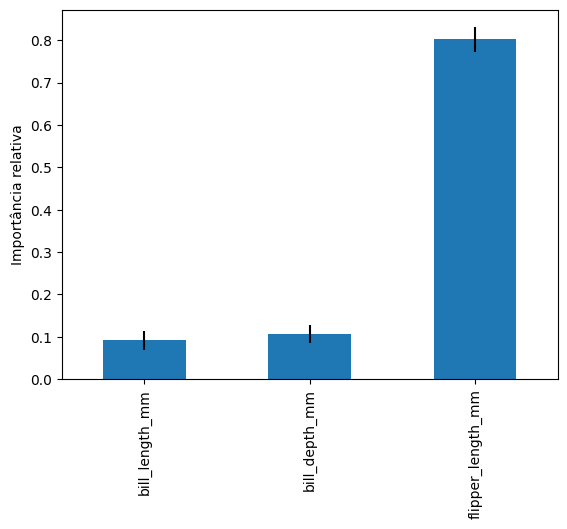

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Importância relativa")
plt.show()

Observamos que o tamanho da nadadeira dos pinguins é o atributo de maior importância em nossa análise. O tamanho e profundidade do bico demonstraram serem bem menos importantes.



## Referências



1.  IZBICKI, Rafael; DOS SANTOS, Tiago Mendonça. Aprendizado de máquina: uma abordagem estatística. 2020. Disponível em: [http://www.rizbicki.ufscar.br/ame/](http://www.rizbicki.ufscar.br/ame/).

2.  Vídeo da Leslie Myint sobre florestas aleatórias [https://www.youtube.com/watch?v=FurqoUSdAPM](https://www.youtube.com/watch?v=FurqoUSdAPM)

3.  StatQuest sobre florestas aleatórias [https://www.youtube.com/watch?v=J4Wdy0Wc_xQ](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ)

4.  Documentação do `scikit-learn` sobre florestas aleatórias para regressão [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

5.  Vídeo sobre a importância dos atributos em uma floresta aleatória [https://www.youtube.com/watch?v=cw4qG9ePZ9Y](https://www.youtube.com/watch?v=cw4qG9ePZ9Y)

6.  Tutorial `scikit-learn` sobre importância de florestas aleatórias [https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

